In [1]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
sp500= yf.Ticker("^GSPC")

In [3]:
sp500=sp500.history(period="max")

In [4]:
sp500


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,0.0,0.0
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,0.0,0.0
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,0.0,0.0


In [5]:
sp500.index


DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-02-26 00:00:00-05:00', '2024-02-27 00:00:00-05:00',
               '2024-02-28 00:00:00-05:00', '2024-02-29 00:00:00-05:00',
               '2024-03-01 00:00:00-05:00', '2024-03-04 00:00:00-05:00',
               '2024-03-05 00:00:00-05:00', '2024-03-06 00:00:00-05:00',
               '2024-03-07 00:00:00-05:00', '2024-03-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24162, freq=None)

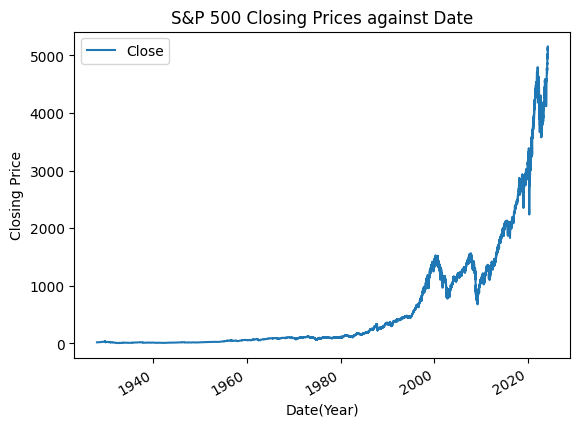

In [6]:
##Visualizing the data by plotting the closing price against index

sp500.plot.line(y="Close", use_index=True)

plt.title('S&P 500 Closing Prices against Date')
plt.xlabel('Date(Year)')
plt.ylabel('Closing Price')
plt.show()



In [7]:
#Deleting unwanted columns of Dividends and Stocks
del sp500["Dividends"]
del sp500["Stock Splits"]


In [8]:
#Using pandas we take the close columns and shift them back one day to obtain that for tomorrow
##For example we see that the (tomorrow price for day "A" becomes the closing price for day "A+1")

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,5078.649902
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,5104.759766
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,5157.359863


In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,5078.649902,0
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,5104.759766,1
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,5157.359863,1


In [12]:
sp500 = sp500.loc["2010-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,1136.520020,1
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,1137.140015,1
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,1141.689941,1
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,1144.979980,1
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,1146.979980,1
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,5078.649902,0
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,5104.759766,1
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,5157.359863,1
